**1. Seleção de características:** há a identificação dos dados que serão utilizados para treinamento do modelo;

**2. Separação treino e teste:** é feita a definição da porcentagem de dados para utilização no treinamento e avaliação do modelo de machine learning;

**3. Criação do modelo:** trabalhada a escolha do tipo de algoritmo e treinamento do modelo a partir dos dado;

**4. Ajuste do modelo:** é realizado o ajuste de parâmetros do modelo para que ele desenvolva um bom aprendizado com base nos dados disponíveis;

**5. Gerando previsões:** é feita a testagem do modelo com as informações não utilizadas no treinamento;

**6. Gerando métricas:** é elaborado o cálculo das métricas que melhor representem como a máquina pode performar em uma situação real ou desejável;

**7. Avaliando métricas:**verifica se o modelo está suficientemente capacitado e compreende se a máquina foi capaz de aprender e não só memorizar as respostas do treinamento, bem como debater quais podem ter sido as causas para o sucesso ou não das previsões;

**8. Melhorando o modelo:** aprimoramento dos parâmetros do modelo, com o objetivo de melhorar a qualidade e a eficiência do aprendizado, de modo que os novos valores permitam também a melhoria dos valores obtidos na etapa 6;

**9. Volta ao passo 1:** o ciclo de desenvolvimento de um modelo de machine learning é iniciado novamente. O ciclo só acaba quando é obtido um modelo de alta performance que funciona bem na tarefa que ele é criado para realizar.

# **1.Dados**

In [6]:
import pandas as pd
import numpy as np

## **1.1 Carregando os dados**

In [7]:
dados = pd.read_json(path_or_buf = '/content/imoveis.json', orient = 'columns')
dados

,ident,listing
0,"{'customerID': '775564-BOJSMVON', 'source': 'W...","{'types': {'unit': 'Outros', 'usage': 'Residen..."
1,"{'customerID': '660895-AUENKNYY', 'source': 'W...","{'types': {'unit': 'Apartamento', 'usage': 'Re..."
2,"{'customerID': '751522-JESYFEQL', 'source': 'W...","{'types': {'unit': 'Outros', 'usage': 'Residen..."
3,"{'customerID': '714052-GAAEWYKS', 'source': 'W...","{'types': {'unit': 'Outros', 'usage': 'Comerci..."
4,"{'customerID': '568886-ZIBFOMCC', 'source': 'W...","{'types': {'unit': 'Apartamento', 'usage': 'Re..."
...,...,...
73610,"{'customerID': '134148-MJIBCMDQ', 'source': 'W...","{'types': {'unit': 'Casa', 'usage': 'Residenci..."
73611,"{'customerID': '541465-QBQVXXXZ', 'source': 'W...","{'types': {'unit': 'Casa', 'usage': 'Residenci..."
73612,"{'customerID': '800542-BZREFTQS', 'source': 'W...","{'types': {'unit': 'Apartamento', 'usage': 'Re..."
73613,"{'customerID': '939419-ECGUNTIH', 'source': 'W...","{'types': {'unit': 'Casa', 'usage': 'Residenci..."


## **1.2 Explorando os dados**

In [8]:
dados.ident[0]

{'customerID': '775564-BOJSMVON', 'source': 'Website'}

In [9]:
dados.listing[0]

{'types': {'unit': 'Outros', 'usage': 'Residencial'},
 'address': {'city': 'Rio de Janeiro',
  'location': {'lon': -43.413557, 'lat': -22.909429},
  'zone': 'Zona Oeste',
  'neighborhood': 'Taquara'},
 'prices': {'price': '45000', 'tax': {'iptu': '0', 'condo': '150'}},
 'features': {'bedrooms': 0,
  'bathrooms': 0,
  'suites': 0,
  'parkingSpaces': 1,
  'usableAreas': '62',
  'totalAreas': '62',
  'floors': 0,
  'unitsOnTheFloor': 0,
  'unitFloor': 0}}

##**1.3 Tratamento de dados**

###Normalização





In [10]:
dados_lista1 = pd.json_normalize(dados.ident)
dados_lista1.head()

,customerID,source
0,775564-BOJSMVON,Website
1,660895-AUENKNYY,Website
2,751522-JESYFEQL,Website
3,714052-GAAEWYKS,Website
4,568886-ZIBFOMCC,Website


In [11]:
dados_lista2 = pd.json_normalize(dados.listing, sep = '_')
dados_lista2.head()

,types_unit,types_usage,address_city,address_location_lon,address_location_lat,address_zone,address_neighborhood,prices_price,prices_tax_iptu,prices_tax_condo,features_bedrooms,features_bathrooms,features_suites,features_parkingSpaces,features_usableAreas,features_totalAreas,features_floors,features_unitsOnTheFloor,features_unitFloor
0,Outros,Residencial,Rio de Janeiro,-43.413557,-22.909429,Zona Oeste,Taquara,45000,0,150,0,0,0,1,62,62,0,0,0
1,Apartamento,Residencial,Rio de Janeiro,-43.509141,-22.869698,Zona Oeste,Santíssimo,45000,0,120,2,1,0,1,44,0,0,0,0
2,Outros,Residencial,Rio de Janeiro,-43.646786,-22.986927,Zona Oeste,Pedra de Guaratiba,50000,0,100,0,0,0,0,132,132,0,0,0
3,Outros,Comercial,Rio de Janeiro,-43.330818,-22.881977,Zona Norte,Cascadura,45000,346,468,0,1,0,0,32,32,0,0,3
4,Apartamento,Residencial,Rio de Janeiro,-43.480742,-23.027653,Zona Oeste,Recreio dos Bandeirantes,50000,120,400,3,2,1,1,60,0,3,4,2


###Junção de DataFrames

In [12]:
dados_imoveis = pd.concat([dados_lista1, dados_lista2], axis = 1) #juntando os dois dataframes pelas colunas
dados_imoveis.head()

,customerID,source,types_unit,types_usage,address_city,address_location_lon,address_location_lat,address_zone,address_neighborhood,prices_price,...,prices_tax_condo,features_bedrooms,features_bathrooms,features_suites,features_parkingSpaces,features_usableAreas,features_totalAreas,features_floors,features_unitsOnTheFloor,features_unitFloor
0,775564-BOJSMVON,Website,Outros,Residencial,Rio de Janeiro,-43.413557,-22.909429,Zona Oeste,Taquara,45000,...,150,0,0,0,1,62,62,0,0,0
1,660895-AUENKNYY,Website,Apartamento,Residencial,Rio de Janeiro,-43.509141,-22.869698,Zona Oeste,Santíssimo,45000,...,120,2,1,0,1,44,0,0,0,0
2,751522-JESYFEQL,Website,Outros,Residencial,Rio de Janeiro,-43.646786,-22.986927,Zona Oeste,Pedra de Guaratiba,50000,...,100,0,0,0,0,132,132,0,0,0
3,714052-GAAEWYKS,Website,Outros,Comercial,Rio de Janeiro,-43.330818,-22.881977,Zona Norte,Cascadura,45000,...,468,0,1,0,0,32,32,0,0,3
4,568886-ZIBFOMCC,Website,Apartamento,Residencial,Rio de Janeiro,-43.480742,-23.027653,Zona Oeste,Recreio dos Bandeirantes,50000,...,400,3,2,1,1,60,0,3,4,2


In [13]:
dados_imoveis.shape

(73615, 21)

In [14]:
for coluna in dados_imoveis.columns:
  print("========"*30)
  print(dados_imoveis[coluna].value_counts())

775564-BOJSMVON    1
917809-TRNXMOHE    1
125760-XEXDELYV    1
294183-VCUBOXCU    1
465524-CFDRZTHS    1
                  ..
200525-LDRZXCVM    1
938284-QWFBFUXB    1
882696-YVZSJYMI    1
566032-WFPGBXHL    1
610503-VULDJJZZ    1
Name: customerID, Length: 73615, dtype: int64
Website    73615
Name: source, dtype: int64
Apartamento    59106
Casa            9389
Outros          5120
Name: types_unit, dtype: int64
Residencial    69596
Comercial       4019
Name: types_usage, dtype: int64
Rio de Janeiro        73607
Queimados                 3
São Gonçalo               2
Cachoeirinha              1
São João de Meriti        1
Armação dos Búzios        1
Name: address_city, dtype: int64
-43.365895    399
-43.462590    278
-43.333066    236
-43.383834    232
-43.516473    218
             ... 
-43.231882      1
-43.236952      1
-43.240152      1
-43.185712      1
-43.250934      1
Name: address_location_lon, Length: 25753, dtype: int64
-23.000371    399
-23.017479    278
-22.937463    236
-2

##**1.4 Limpeza dos dados**

###Filtro

In [15]:
# criando o filtro
filtro = (dados_imoveis['types_usage'] == 'Residencial') & (dados_imoveis['address_city'] == "Rio de Janeiro")

# aplicando o filtro
dados_imoveis = dados_imoveis[filtro]
dados_imoveis.head()

,customerID,source,types_unit,types_usage,address_city,address_location_lon,address_location_lat,address_zone,address_neighborhood,prices_price,...,prices_tax_condo,features_bedrooms,features_bathrooms,features_suites,features_parkingSpaces,features_usableAreas,features_totalAreas,features_floors,features_unitsOnTheFloor,features_unitFloor
0,775564-BOJSMVON,Website,Outros,Residencial,Rio de Janeiro,-43.413557,-22.909429,Zona Oeste,Taquara,45000,...,150,0,0,0,1,62,62,0,0,0
1,660895-AUENKNYY,Website,Apartamento,Residencial,Rio de Janeiro,-43.509141,-22.869698,Zona Oeste,Santíssimo,45000,...,120,2,1,0,1,44,0,0,0,0
2,751522-JESYFEQL,Website,Outros,Residencial,Rio de Janeiro,-43.646786,-22.986927,Zona Oeste,Pedra de Guaratiba,50000,...,100,0,0,0,0,132,132,0,0,0
4,568886-ZIBFOMCC,Website,Apartamento,Residencial,Rio de Janeiro,-43.480742,-23.027653,Zona Oeste,Recreio dos Bandeirantes,50000,...,400,3,2,1,1,60,0,3,4,2
5,526755-OBLTYTEN,Website,Outros,Residencial,Rio de Janeiro,-43.571183,-22.966059,Zona Oeste,Guaratiba,50000,...,0,0,0,0,0,200,200,0,0,0


###Tipos de Variaveis

In [16]:
#atenção ao tipo de variavel e o indice
dados_imoveis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69588 entries, 0 to 73614
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customerID                69588 non-null  object 
 1   source                    69588 non-null  object 
 2   types_unit                69588 non-null  object 
 3   types_usage               69588 non-null  object 
 4   address_city              69588 non-null  object 
 5   address_location_lon      69449 non-null  float64
 6   address_location_lat      69449 non-null  float64
 7   address_zone              69588 non-null  object 
 8   address_neighborhood      69588 non-null  object 
 9   prices_price              69588 non-null  object 
 10  prices_tax_iptu           60863 non-null  object 
 11  prices_tax_condo          63527 non-null  object 
 12  features_bedrooms         69588 non-null  int64  
 13  features_bathrooms        69588 non-null  int64  
 14  featur

Ao rodar .info() verificamos:

1. Int64Index: 69588 entries, 0 to 73614;
2. prices_price, prices_tax_iptu, prices_tax_condo, features_usableAreas, features_totalAreas = objetcs;
3. address_location_lon, address_location_lat, prices_tax_iptu, prices_tax_condo ≠ 69588

Temos que consertar cada um desses elementos

Consertando (1): Resetar o index para que as infos fiquem ordenadas corretamente

In [17]:
dados_imoveis.reset_index(drop = True, inplace = True) #drop remove indices antigos | inplace substituir pelo indice novo

In [18]:
dados_imoveis.info(verbose = False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69588 entries, 0 to 69587
Columns: 21 entries, customerID to features_unitFloor
dtypes: float64(2), int64(7), object(12)
memory usage: 11.1+ MB


Consertando (2): Dicionario de dados para alterar o tipo de dados

In [19]:
dados_imoveis = dados_imoveis.astype({
    'prices_price': 'float64', 
    'prices_tax_iptu': 'float64',
    'prices_tax_condo': 'float64',
    'features_usableAreas': 'int64',
    'features_totalAreas': 'int64'
})

dados_imoveis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69588 entries, 0 to 69587
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customerID                69588 non-null  object 
 1   source                    69588 non-null  object 
 2   types_unit                69588 non-null  object 
 3   types_usage               69588 non-null  object 
 4   address_city              69588 non-null  object 
 5   address_location_lon      69449 non-null  float64
 6   address_location_lat      69449 non-null  float64
 7   address_zone              69588 non-null  object 
 8   address_neighborhood      69588 non-null  object 
 9   prices_price              69588 non-null  float64
 10  prices_tax_iptu           60863 non-null  float64
 11  prices_tax_condo          63527 non-null  float64
 12  features_bedrooms         69588 non-null  int64  
 13  features_bathrooms        69588 non-null  int64  
 14  featur

###Lidando com dados nulos

####Dados nulos zone

In [20]:
dados_imoveis.address_zone.value_counts()

Zona Oeste      35523
Zona Sul        18535
Zona Norte      14379
Zona Central     1002
                  149
Name: address_zone, dtype: int64

In [21]:
# substituindo os valores sem nada por valores especificamente vazios
dados_imoveis['address_zone'] = dados_imoveis['address_zone'].replace('', np.nan)

In [22]:
#verificando nossa substituição - fazendo uma soma de todos os valores nulos encontrados na coluna
dados_imoveis.address_zone.isnull().sum()

149

In [23]:
# associando bairros com suas zonas atraves de um dicionario
dici = dados_imoveis[~dados_imoveis['address_zone'].isna()].drop_duplicates(subset = ['address_neighborhood']).to_dict('records') # selecionamos de dados_imoveis em adrress_zone os elementos que nao estao vazios e excluimos duplicatas no conjunto de bairros
print(dici)

[{'customerID': '775564-BOJSMVON', 'source': 'Website', 'types_unit': 'Outros', 'types_usage': 'Residencial', 'address_city': 'Rio de Janeiro', 'address_location_lon': -43.413557, 'address_location_lat': -22.909429, 'address_zone': 'Zona Oeste', 'address_neighborhood': 'Taquara', 'prices_price': 45000.0, 'prices_tax_iptu': 0.0, 'prices_tax_condo': 150.0, 'features_bedrooms': 0, 'features_bathrooms': 0, 'features_suites': 0, 'features_parkingSpaces': 1, 'features_usableAreas': 62, 'features_totalAreas': 62, 'features_floors': 0, 'features_unitsOnTheFloor': 0, 'features_unitFloor': 0}, {'customerID': '660895-AUENKNYY', 'source': 'Website', 'types_unit': 'Apartamento', 'types_usage': 'Residencial', 'address_city': 'Rio de Janeiro', 'address_location_lon': -43.509141, 'address_location_lat': -22.869698, 'address_zone': 'Zona Oeste', 'address_neighborhood': 'Santíssimo', 'prices_price': 45000.0, 'prices_tax_iptu': 0.0, 'prices_tax_condo': 120.0, 'features_bedrooms': 2, 'features_bathrooms':

In [24]:
# dicionario linkando bairro e zona
dic_zonas = {dic['address_neighborhood'] : dic['address_zone'] for dic in dici}
print(dic_zonas)

{'Taquara': 'Zona Oeste', 'Santíssimo': 'Zona Oeste', 'Pedra de Guaratiba': 'Zona Oeste', 'Recreio dos Bandeirantes': 'Zona Oeste', 'Guaratiba': 'Zona Oeste', 'Jacarezinho': 'Zona Norte', 'Santa Cruz': 'Zona Oeste', 'Vargem Grande': 'Zona Oeste', 'Bangu': 'Zona Oeste', 'Tanque': 'Zona Oeste', 'Santo Cristo': 'Zona Central', 'Coelho Neto': 'Zona Norte', 'Bento Ribeiro': 'Zona Norte', 'Campo Grande': 'Zona Oeste', 'Oswaldo Cruz': 'Zona Norte', 'Camorim': 'Zona Oeste', 'Sepetiba': 'Zona Oeste', 'Vigário Geral': 'Zona Norte', 'Campinho': 'Zona Norte', 'Realengo': 'Zona Oeste', 'Jacarepaguá': 'Zona Oeste', 'Cidade de Deus': 'Zona Oeste', 'Honório Gurgel': 'Zona Norte', 'Centro': 'Zona Central', 'Cosmos': 'Zona Oeste', 'Tomás Coelho': 'Zona Norte', 'Cascadura': 'Zona Norte', 'Pavuna': 'Zona Norte', 'Paciência': 'Zona Oeste', 'Praça Seca': 'Zona Oeste', 'Vila Valqueire': 'Zona Oeste', 'Inhoaíba': 'Zona Oeste', 'Vicente de Carvalho': 'Zona Norte', 'Senador Vasconcelos': 'Zona Oeste', 'Turiaçu'

In [25]:
for bairro,zona in dic_zonas.items(): dados_imoveis.loc[dados_imoveis['address_neighborhood'] == bairro, 'address_zone'] = zona

In [26]:
# verificando ainda se há valores faltantes
dados_imoveis.address_zone.isnull().sum()

0

####Dados nulos prices

In [27]:
#fazendo uma soma de todos os valores nulos encontrados na coluna
dados_imoveis.prices_tax_iptu.isnull().sum()

8725

In [28]:
#fazendo uma soma de todos os valores nulos encontrados na coluna
dados_imoveis.prices_tax_condo.isnull().sum()

6061

In [29]:
# substituindo os valores sem nada por valores especificamente 0
dados_imoveis.prices_tax_iptu.fillna(0, inplace = True) #prrencher lugares vazios por 0
dados_imoveis.prices_tax_condo.fillna(0, inplace = True)

In [30]:
# verificando ainda se há valores faltantes
print(f"Total de prices_tax_iptu nulos: {dados_imoveis.prices_tax_iptu.isnull().sum()}")
print(f"Total de prices_tax_condo nulos: {dados_imoveis.prices_tax_condo.isnull().sum()}")

Total de prices_tax_iptu nulos: 0
Total de prices_tax_condo nulos: 0


###Removendo colunas que nao sao interessantes para o nosso modelo

In [31]:
dados_imoveis.drop(['customerID', 'source', 'types_usage', 'address_city', 'address_location_lon', 'address_location_lat', 'address_neighborhood'], axis = 1, inplace = True) #removendo o bairro pois quero usar apenas as zonas para tratar nossos dados

### Alterando os nomes das colunas

In [32]:
dicionario_colunas = {
    'types_unit': 'unit',
    'address_zone': 'zone',
    'prices_price': 'price',
    'prices_tax_iptu': 'tax_iptu',
    'prices_tax_condo': 'tax_condo',
    'features_bedrooms': 'bedrooms',
    'features_bathrooms': 'bathrooms',
    'features_suites': 'suites',
    'features_parkingSpaces': 'parkingSpaces',
    'features_usableAreas': 'usableAreas',
    'features_totalAreas': 'totalAreas',
    'features_floors': 'floors',
    'features_unitsOnTheFloor': 'unitOnTheFloor',
    'features_unitFloor': 'unitFloor'
}

dados_imoveis = dados_imoveis.rename(dicionario_colunas, axis = 1)
dados_imoveis.head()

,unit,zone,price,tax_iptu,tax_condo,bedrooms,bathrooms,suites,parkingSpaces,usableAreas,totalAreas,floors,unitOnTheFloor,unitFloor
0,Outros,Zona Oeste,45000.0,0.0,150.0,0,0,0,1,62,62,0,0,0
1,Apartamento,Zona Oeste,45000.0,0.0,120.0,2,1,0,1,44,0,0,0,0
2,Outros,Zona Oeste,50000.0,0.0,100.0,0,0,0,0,132,132,0,0,0
3,Apartamento,Zona Oeste,50000.0,120.0,400.0,3,2,1,1,60,0,3,4,2
4,Outros,Zona Oeste,50000.0,0.0,0.0,0,0,0,0,200,200,0,0,0


#**2. Regressão Linear**

##**2.1 Correlação**



*   Correlação: grau de relação entre variaveis. Pode ser positiva ou negativa essa relação
*   Multicolinearidade: relação perfeita ou exata entre variaveis





In [33]:
correlacao = dados_imoveis.corr()
correlacao

,price,tax_iptu,tax_condo,bedrooms,bathrooms,suites,parkingSpaces,usableAreas,totalAreas,floors,unitOnTheFloor,unitFloor
price,1.000000,0.029751,0.047704,0.530474,0.571725,0.588738,0.423186,0.692502,-0.000619,-0.061910,-0.133700,-0.000143
tax_iptu,0.029751,1.000000,0.226213,0.013625,0.015086,0.019101,0.009720,0.014654,-0.000164,0.006704,0.005044,0.001204
tax_condo,0.047704,0.226213,1.000000,0.018460,0.020009,0.023479,0.018010,0.019712,-0.000313,0.013821,-0.000528,0.003072
bedrooms,0.530474,0.013625,0.018460,1.000000,0.665958,0.600596,0.467391,0.563545,-0.000532,-0.082025,-0.130611,-0.007146
bathrooms,0.571725,0.015086,0.020009,0.665958,1.000000,0.752495,0.487624,0.597793,0.000041,-0.044552,-0.107347,0.007599
suites,0.588738,0.019101,0.023479,0.600596,0.752495,1.000000,0.484850,0.577344,0.003971,-0.047576,-0.091408,0.005300
parkingSpaces,0.423186,0.009720,0.018010,0.467391,0.487624,0.484850,1.000000,0.483709,-0.000062,-0.048310,-0.074348,0.003788
usableAreas,0.692502,0.014654,0.019712,0.563545,0.597793,0.577344,0.483709,1.000000,-0.000214,-0.103729,-0.144041,-0.012715
totalAreas,-0.000619,-0.000164,-0.000313,-0.000532,0.000041,0.003971,-0.000062,-0.000214,1.000000,0.014677,0.003975,0.002329
floors,-0.061910,0.006704,0.013821,-0.082025,-0.044552,-0.047576,-0.048310,-0.103729,0.014677,1.000000,0.737802,0.121067


### Criar um mapa de calor para averiguar melhor a correlação

In [34]:
#importando bibliotecas para a visualizacao
import matplotlib.pyplot as plt
import seaborn as sns

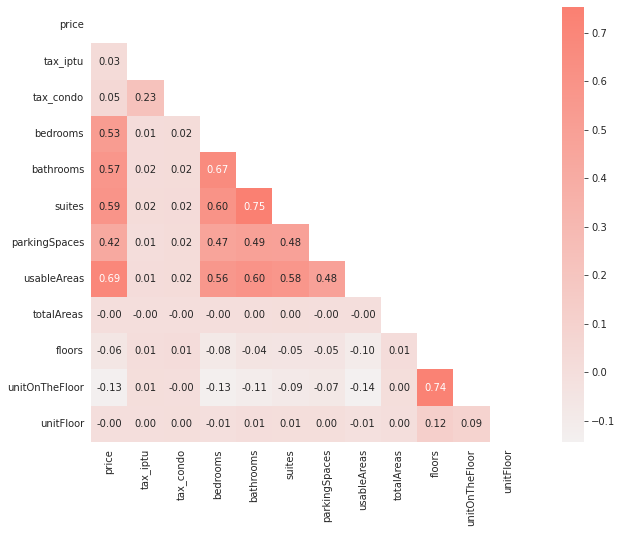

In [35]:
# visuzalizacao das correlaçoes
cores = sns.color_palette('light:salmon', as_cmap=True)
mask = np.zeros_like(correlacao)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(13, 8))
    ax = sns.heatmap(correlacao, cmap=cores, mask=mask, square=True, fmt='.2f', annot=True)

Analise da distribuicao da variavel resposta

Text(0.5, 0, 'Preco')

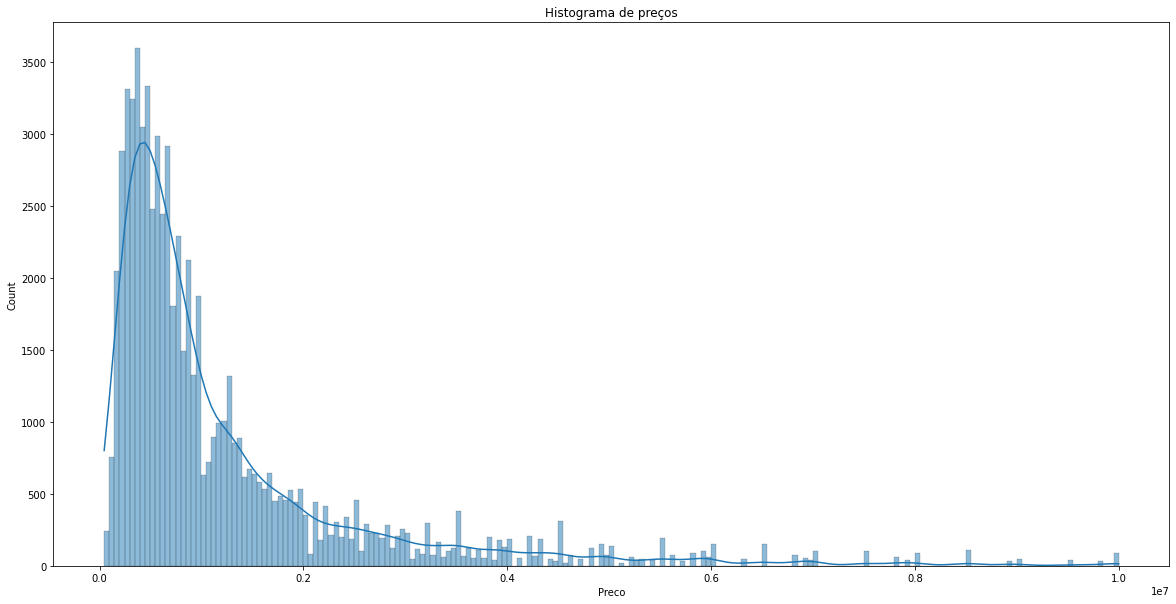

In [36]:
# antes (distrib. assimatrica a direita)
ax = sns.histplot(data=dados_imoveis, x = 'price', kde = True)
ax.figure.set_size_inches(20,10)
ax.set_title('Histograma de preços')
ax.set_xlabel('Preco')

###Transformação das Variaveis

Estamos realizando uma transformação logarítmica das variáveis para obtermos uma distribuição simétrica (mais próxima da normal), para que possamos usar o modelo de regressão linear. A transformação realizada é:

$log1p = log(1+x)$

Lembrar de realizar a transformação inversa para obter o valor original:

$e^{1m} = e^{x} - 1$





In [37]:
#transformar os dados
from sklearn.preprocessing import FunctionTransformer

transformer = FunctionTransformer(np.log1p, validate=True)
dados_transformados = transformer.transform(dados_imoveis.select_dtypes(exclude=['object'])) #tranformar os dados numericos excluindo os tipo object

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:413: UserWarning: X has feature names, but FunctionTransformer was fitted without feature names
  warnings.warn(


In [38]:
colunas_dados_tranformados = dados_imoveis.select_dtypes(exclude=['object']).columns

df_transformado = pd.concat([dados_imoveis.select_dtypes(include=['object']), pd.DataFrame(dados_transformados, columns=colunas_dados_tranformados)], axis=1)
df_transformado.head()

,unit,zone,price,tax_iptu,tax_condo,bedrooms,bathrooms,suites,parkingSpaces,usableAreas,totalAreas,floors,unitOnTheFloor,unitFloor
0,Outros,Zona Oeste,10.714440,0.000000,5.017280,0.000000,0.000000,0.000000,0.693147,4.143135,4.143135,0.000000,0.000000,0.000000
1,Apartamento,Zona Oeste,10.714440,0.000000,4.795791,1.098612,0.693147,0.000000,0.693147,3.806662,0.000000,0.000000,0.000000,0.000000
2,Outros,Zona Oeste,10.819798,0.000000,4.615121,0.000000,0.000000,0.000000,0.000000,4.890349,4.890349,0.000000,0.000000,0.000000
3,Apartamento,Zona Oeste,10.819798,4.795791,5.993961,1.386294,1.098612,0.693147,0.693147,4.110874,0.000000,1.386294,1.609438,1.098612
4,Outros,Zona Oeste,10.819798,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.303305,5.303305,0.000000,0.000000,0.000000


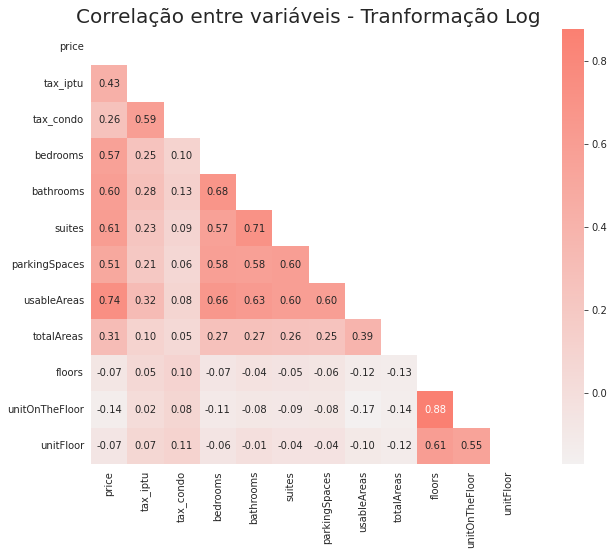

In [39]:
#depois da transformação
correlacao_transformado = df_transformado.corr()
mask = np.zeros_like(correlacao_transformado)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(13, 8))
    ax = sns.heatmap(correlacao_transformado, cmap=cores, mask=mask, square=True, fmt='.2f', annot=True)
    ax.set_title('Correlação entre variáveis - Tranformação Log', fontsize=20)

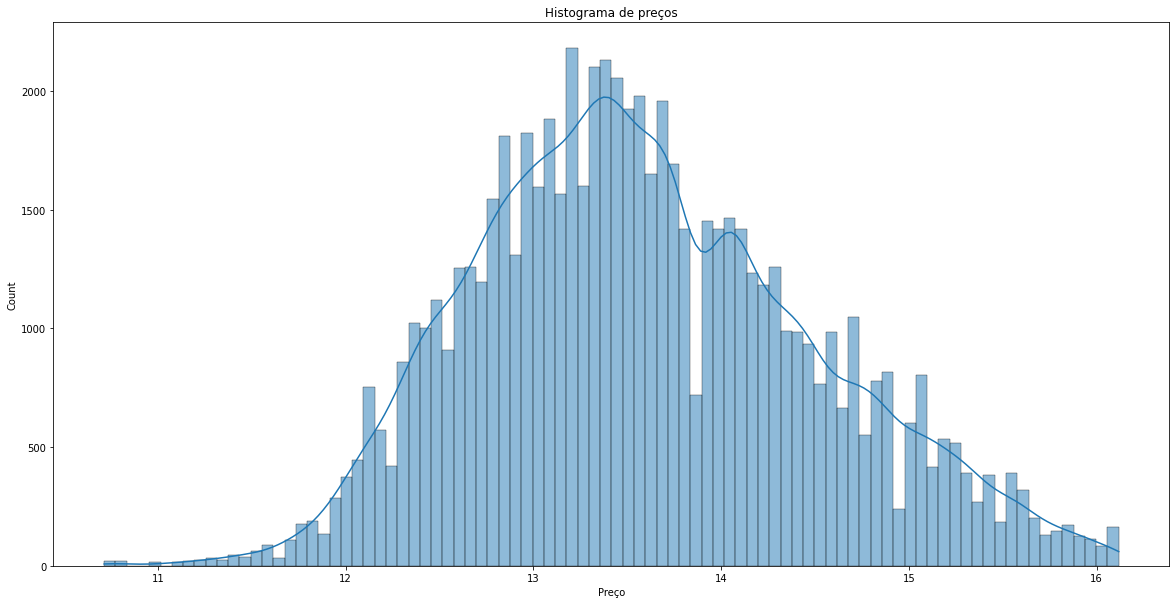

In [40]:
#depois (distrib. simétrica)
ax = sns.histplot(data=df_transformado, x='price', kde=True)
ax.figure.set_size_inches(20, 10)
ax.set_title('Histograma de preços')
ax.set_xlabel('Preço');

###Dummies

In [41]:
variaveis_categoricas = df_transformado.select_dtypes(include=['object']).columns
variaveis_categoricas


Index(['unit', 'zone'], dtype='object')

In [42]:
df_dummies = pd.get_dummies(df_transformado[variaveis_categoricas])
df_dummies.head()

,unit_Apartamento,unit_Casa,unit_Outros,zone_Zona Central,zone_Zona Norte,zone_Zona Oeste,zone_Zona Sul
0,0,0,1,0,0,1,0
1,1,0,0,0,0,1,0
2,0,0,1,0,0,1,0
3,1,0,0,0,0,1,0
4,0,0,1,0,0,1,0


In [43]:
dados_imoveis_dummies = pd.concat([df_transformado.drop(variaveis_categoricas, axis=1), df_dummies], axis=1) 
dados_imoveis_dummies.head()

,price,tax_iptu,tax_condo,bedrooms,bathrooms,suites,parkingSpaces,usableAreas,totalAreas,floors,unitOnTheFloor,unitFloor,unit_Apartamento,unit_Casa,unit_Outros,zone_Zona Central,zone_Zona Norte,zone_Zona Oeste,zone_Zona Sul
0,10.714440,0.000000,5.017280,0.000000,0.000000,0.000000,0.693147,4.143135,4.143135,0.000000,0.000000,0.000000,0,0,1,0,0,1,0
1,10.714440,0.000000,4.795791,1.098612,0.693147,0.000000,0.693147,3.806662,0.000000,0.000000,0.000000,0.000000,1,0,0,0,0,1,0
2,10.819798,0.000000,4.615121,0.000000,0.000000,0.000000,0.000000,4.890349,4.890349,0.000000,0.000000,0.000000,0,0,1,0,0,1,0
3,10.819798,4.795791,5.993961,1.386294,1.098612,0.693147,0.693147,4.110874,0.000000,1.386294,1.609438,1.098612,1,0,0,0,0,1,0
4,10.819798,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.303305,5.303305,0.000000,0.000000,0.000000,0,0,1,0,0,1,0


##**2.2 Ajuste e Previsão**

### Divisão dos dados entre dados para treino e dados para testes

In [44]:
#variáveis explanatórias (independentes)
X = dados_imoveis_dummies.drop('price', axis=1) #todos os nossos dados menos o preço

#variável dependente
y = dados_imoveis_dummies['price']

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
#divisão em conjunto de treino e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.3, random_state=42)

###Modelo

In [47]:
from sklearn.linear_model import LinearRegression

In [48]:
#Instanciando o modelo
lr = LinearRegression()

In [49]:
#treino
lr.fit(X_treino, y_treino)

LinearRegression()

In [50]:
#teste
previsao_lr = lr.predict(X_teste)

In [51]:
#resultados da previsão
previsao_lr

array([13.25768024, 12.45705313, 12.91487963, ..., 13.13161073,
       12.42379775, 14.49548233])

In [52]:
#transformação inversa de um dos valores acima
np.expm1(13.25768024)

572448.7513552749

##**2.3 Metrica**

###Coeficiente de Determinação


Descobrir quão “bem” uma linha de regressão amostral é adequada aos dados:
*   r2 situa-se entre 0 e 1
*   r2 mede a proporção ou percentual da variação total de Y explicada pelo modelo de regressão.

In [53]:
#importar a biblioteca
from sklearn.metrics import r2_score

In [54]:
r2_lr = r2_score(y_teste, previsao_lr)
r2_lr

0.7880682093407632

Durante as aulas conhecemos as métricas do coeficiente de determinação - R² (r2_score()). Além dessa, existem diversas outras métricas que podem também ser bastante úteis durante a avaliação de um modelo de regressão. Abaixo você poderá encontrar as métricas mais utilizadas e as suas traduções em português:

*   **Mean squared error - MSE** (Erro Quadrático Médio);
*   **Mean absolute error - MAE** (Erro absoluto médio);
*   **Root Mean Squared Error - RMSE** (Raiz Quadrada do Erro Médio);
*   **Mean Squared Logarithmic Error** - MSLE (Erro Logarítmico Quadrado Médio);
*   **Mean Absolute Percentage Error** - MAPE (Percentual do Erro Médio Absoluto).




**Mean squared error - MSE**

O erro quadrático médio (MSE) é muito utilizado para verificar o quão bem o modelo está se saindo e dá um maior peso aos maiores erros já que ao fazermos o seu cálculo cada erro, que é a diferença entre o valor esperado para o valor obtido, é elevado ao quadrado e após isso a média desses erros é calculada. Para avaliar modelos com essa métrica, quando mais próxima de 0 melhor o modelo está prevendo os valores desejados. Essa métrica apresenta um valor mínimo 0 e não possui um valor máximo.

A documentação do scikit-learn possui informações que oferecem mais alguns detalhes a respeito dessa métrica em “mean_squared_error”.


**Mean absolute error - MAE**

O erro médio absoluto (MAE) é calculado a partir da média dos erros absolutos, portanto utilizamos o módulo de cada erro e ao final calculamos a média. Assim como MSE, para analisarmos os modelos de regressão de acordo com essa métrica, quanto menor o erro médio absoluto, melhor o modelo está classificando as novas amostras. Essa métrica apresenta um valor mínimo 0 e não apresenta valor máximo.

A documentação do scikit-learn oferece mais detalhes sobre essa métrica em “MAE”.

**Root Mean Squared Error - RMSE**

A Raiz Quadrada do Erro Médio é bem similar à métrica MSE, de modo que ela é calculada pela raiz quadrada dele. O RMSE determina a distância de um ponto de dados em relação a linha ajustada, medida ao longo de uma linha vertical. Desse modo, ela informa a concentração dos dados em torno da linha de ajuste.

Você pode acessar a documentação do scikit-learn para saber mais sobre essa métrica: metrics.mean_squared_error .

**Mean Squared Logarithmic Error - MSLE**

O Erro Logarítmico Quadrado Médio é dado pela medida da razão entre os valores esperados e os preditos, de toda forma, ele se caracteriza por ser uma variação da métrica MSE.

O principal ponto de foco dessa métrica é medir a diferença relativa entre os valores esperados e os preditos pelo modelo, ou seja, verifica a diferença percentual entre eles. De modo que, pequenas diferenças entre valores pequenos são tratados igualmente a grandes diferenças entre valores grandes, diferentemente do que acontece no MSE, como mostrado no exemplo:

-------------------------------------------------------------------------

Valores verdadeiros | 50 | 50000

Valores Preditos | 40 | 40000

MSE | 100.0 | 100000000.0

MSLE | 0.047634 | 0.049790

---------------------------------------------------------------------------

Isso nos mostra que as grandes diferenças entre os valores reais e preditos tem pouca variação no resultado final da métrica. Portanto, essa métrica é mais utilizada quando não desejamos que grandes erros sejam significativamente mais penalizados que erros pequenos.

Para saber mais sobre essa métrica e como utilizá-la você pode acessar a documentação do scikit-learn: metrics.mean_squared_log_error.

**Mean Absolute Percentage Error - MAPE**

O Mean Absolute Percentage Error é bem similar ao Mean Absolute Error - MAE, com a diferença de que ele mede a precisão como uma porcentagem e pode ser calculado como a porcentagem do MAE para cada amostra. O MAPE é muito utilizado em problemas de regressão pois traz uma interpretação bem intuitiva quanto ao erro relativo.

Para saber mais sobre essa métrica e como utilizá-la você pode acessar a documentação do scikit-learn: metrics.mean_absolute_percentage_error.

Se desejar saber mais sobre essas métricas, você pode ler o artigo Métricas de avaliação para séries temporais.

#**3.Árvore de decisão para Regresso**

##**3.1 Implementando o Modelo**

In [55]:
from sklearn.tree import DecisionTreeRegressor

In [56]:
#Instanciando o modelo
dtr = DecisionTreeRegressor(random_state=42, max_depth=5)

In [57]:
#Treino
dtr.fit(X_treino, y_treino)

DecisionTreeRegressor(max_depth=5, random_state=42)

In [58]:
#Teste
previsao_dtr = dtr.predict(X_teste)

In [59]:
#Resultados da previsão
previsao_dtr

array([13.55136531, 12.33741035, 13.24458243, ..., 13.23643158,
       12.33741035, 14.55274625])

**Gráfico de erro de predição:** Um gráfico de erros de predição mostra os alvos reais em relação aos valores previstos. Em um modelo perfeito, esses pontos estariam alinhados em 45 grau.



/usr/local/lib/python3.8/dist-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


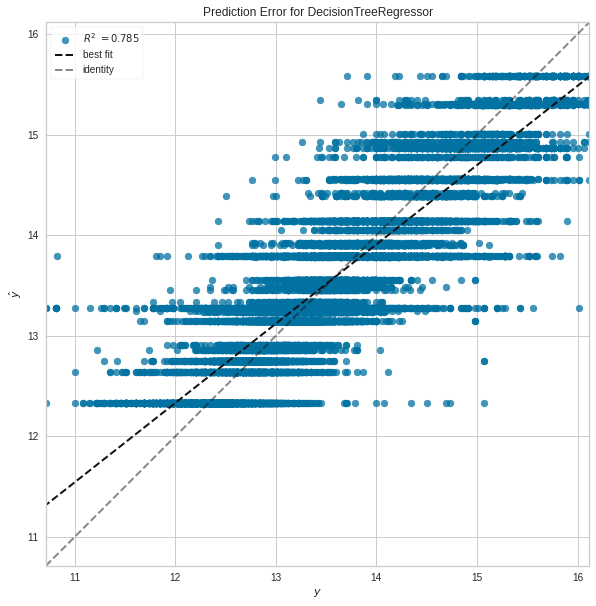

<AxesSubplot:title={'center':'Prediction Error for DecisionTreeRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [60]:
from yellowbrick.regressor import PredictionError

fig, ax = plt.subplots(figsize=(10, 10))
pev = PredictionError(dtr)
pev.fit(X_treino, y_treino)
pev.score(X_teste, y_teste)
pev.poof()

##**3.2 Metrica**

In [61]:
#coeficiente de determinacao 
r2_dtr = r2_score(y_teste, previsao_dtr)
r2_dtr

0.7846916218477392

#**4.Random Forest para Regressão**



Ao realizar predições com diversos algoritmos de machine learning ou várias predições com um mesmo algoritmo, temos diversas possíveis respostas - algumas estão corretas e outras erradas. Podemos então combinar essas respostas a fim de obter um modelo somente com as respostas mais frequentes.

Essa combinação de um grupo de preditores (como classificadores ou regressores), na maioria dos casos, obterá melhores predições que um preditor individual. Essa técnica é chamada de aprendizado ensemble (agrupamento) e um algoritmo que utiliza esse aprendizado ensemble recebe o nome de método ensemble. Vamos conhecer dois desses métodos, que são bagging e boosting.


---



###**1. Bagging**

Bagging, que também é conhecido como bootstrapping, é uma abordagem em que utilizamos o mesmo algoritmo de treinamento para todos os preditores e os treinamos em subconjunto aleatórios do conjunto de dados de treino. A amostragem por bootstrap consiste em amostragem por reposição significando que, se sortearmos um elemento, isso não impede o mesmo elemento de aparecer em sorteios futuros.

Em outras palavras, o bagging permite que os conjuntos aleatórios contenham a mesma amostra repetidas vezes, logo, os modelos apresentarão resultados diferentes, uma vez que são treinados com diferentes conjuntos de dados.

Após finalizar o treinamento de todos os preditores, pode-se agora realizar a predição de uma nova instância, mas como isso é executado? A nova amostra vai ser submetida a todos os preditores, seus resultados serão agregados e será escolhida a amostra que tiver mais votos (ou a moda) no caso de problemas de classificação. Para os problemas de regressão, a média de todas as previsões é computada e essa será a previsão final.

Um algoritmo bastante conhecido e que utiliza essa abordagem é o Random Forest, que segue as seguintes etapas:

Escolher aleatoriamente amostras a partir do conjunto de treinamento;
Construir a árvore de decisão associada a esse conjunto de dados;
Repetir os passos 1 e 2 para uma quantidade de árvores escolhida pela pessoa cientista de dados; e
Definir o resultado da previsão como sendo a predição mais frequente para problemas de classificação ou média dos resultados obtidos para problemas de regressão.


###**2.Boosting**

Enquanto o bagging treina de forma paralela vários algoritmos, como por exemplo várias árvores de decisão, o boosting treina de forma sequencial de maneira que cada algoritmo tenta corrigir os erros do algoritmo anterior.

Os modelos que utilizam método boosting adotam as seguintes etapas:

Treinar o primeiro modelo;
Verificar que erros foram cometidos;
Treinar outro modelo que soluciona esses erros;
Verificar os erros cometidos novamente, e isso é repetido sequencialmente.
A predição final será a predição oferecida pelo último modelo treinado que corrigiu os erros de todos os predecessores.

Dois algoritmos ensemble que utilizam boosting bastante conhecidos e utilizados são AdaBoost e o Gradient boosting que está implementado tanto no sklearn quando de forma otimizada na popular biblioteca XGBoost (Extreme Gradient Boosting).




##**4.1 Previsões**

**Ponto de Atenção :** Os parâmetros são praticamente os mesmos entre o *DecisionTreeRegressor()* e o *RandomForestRegressor()*, com exceção de:

***n_estimators:*** quantidade de árvores na floresta

***bootstrap:*** define se será utilizado o método estatístico de amostragem bootstrap

***oob_score:*** define se será utilizado o método de amostragem out-of-bag para mensurar os erros da predição

***n_jobs:***número de jobs rodando paralelamente (computação paralela - processadores)

***warm_start:*** faz a adequação de uma nova floresta ou usa uma floresta existente.

***max_samples:***para o caso do bootstrap ser True, define o número de amostras a serem extraídas de X para treinar cada árvore base.

In [62]:
from sklearn.ensemble import RandomForestRegressor

In [63]:
rf = RandomForestRegressor(random_state=42, max_depth=5, n_estimators=10)

In [64]:
rf.fit(X_treino, y_treino)

RandomForestRegressor(max_depth=5, n_estimators=10, random_state=42)

In [65]:
rf.fit(X_treino, y_treino)

RandomForestRegressor(max_depth=5, n_estimators=10, random_state=42)

In [66]:
previsao_rf = rf.predict(X_teste)

**Gráfico de erro de predição**

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


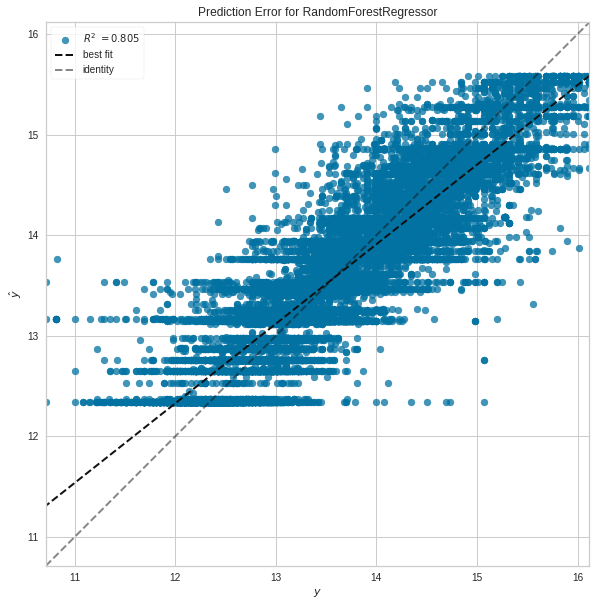

<AxesSubplot:title={'center':'Prediction Error for RandomForestRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [67]:
from yellowbrick.regressor import PredictionError

fig, ax = plt.subplots(figsize=(10, 10))
pev = PredictionError(rf)
pev.fit(X_treino, y_treino)
pev.score(X_teste, y_teste)
pev.poof()

##**4.2 Métrica**

In [68]:
#coeficiente de determinacao
r2_rf = r2_score(y_teste, previsao_rf)
r2_rf

0.805273364453047

#**5.Técnicas de Otimização**

##**5.1 Ferramentas de Otimização**

###**1.Cross Validation (Validação Cruzada)**



*   Cross Validation é uma técnica muito utilizada para avaliação de desempenho de modelos e consequente verificação de tendências no aprendizado de máquina. Ele consiste em particionar os dados em subconjuntos (partes), onde um subconjunto é utilizado para treino e outro subconjunto é utilizado para teste e avaliação do desempenho do modelo.
* Os dados particionados são os de treino (70% dos dados originais)!


*   K-fold: conjunto de treino é dividido de forma aleatória em K subconjuntos de aproximadamente mesmo tamanho, depois são realizados K iterações, onde K-1 subconjuntos são para treino e 1 para validação.

*   O desempenho calculado pela validação cruzada k-fold é a média de todos os valores calculados em cada iteração.

###**2.Randomized Parameter Optimization (Otimização Aleatória de Parâmetros)**



*   "Define um espaço de busca como um domínio limitado de valores de hiperparâmetros e pontos de amostra aleatórios nesse domínio."




##**5.2 Otimizando a árvore de decisão**

In [69]:
#divisão do dataset em 3 pedaços
from sklearn.model_selection import KFold

#definindo o K - número de subconjuntos
cv = KFold(n_splits = 5, shuffle=True)

###Cross Validation

In [70]:
from sklearn.model_selection import cross_val_score 

In [71]:
desempenho_cross_val_r2 = cross_val_score(estimator = dtr,
                                       X = X_treino, 
                                       y = y_treino,
                                       scoring = 'r2',
                                       cv = cv)
print('Desempenho médio de r2: {}'.format(round(desempenho_cross_val_r2.mean(), 3)))

Desempenho médio de r2: 0.781


###Random Search Validation

In [72]:
#seleção de hiperparâmetros
param_random_dt = {
    'criterion': ['squared_error', 'absolute_error'],
    'max_depth': [6, 8, 10, 12, 14, 16],
    'min_samples_leaf': [6, 8, 10],
    'min_samples_split': [8, 10, 12, 14, 16],
    'max_features': ['sqrt', 'log2', 'auto'],
}

In [73]:
from sklearn.model_selection import RandomizedSearchCV


In [74]:
random_cv_dt = RandomizedSearchCV(
    dtr, 
    param_random_dt, 
    n_iter=5, 
    cv=cv, 
    scoring='r2',
    n_jobs=-1
)

In [75]:
randomcv_dtr = random_cv_dt.fit(X_treino, y_treino)

/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


In [76]:
pd.DataFrame(randomcv_dtr.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.498678,0.107440,0.013358,0.003739,14,10,auto,16,squared_error,"{'min_samples_split': 14, 'min_samples_leaf': ...",0.859192,0.867662,0.870023,0.866516,0.860586,0.864796,0.004186,1
1,0.339156,0.080308,0.007660,0.002779,8,8,auto,12,squared_error,"{'min_samples_split': 8, 'min_samples_leaf': 8...",0.859472,0.863156,0.865841,0.863899,0.860763,0.862626,0.002265,2
2,0.088689,0.004953,0.005851,0.000191,12,10,log2,12,squared_error,"{'min_samples_split': 12, 'min_samples_leaf': ...",0.829427,0.834648,0.842138,0.837568,0.825005,0.833757,0.006015,5
3,0.244302,0.008864,0.005699,0.000191,16,6,auto,10,squared_error,"{'min_samples_split': 16, 'min_samples_leaf': ...",0.852791,0.857238,0.862046,0.860167,0.856194,0.857687,0.003211,4
4,0.309919,0.012913,0.006098,0.000624,12,8,auto,16,squared_error,"{'min_samples_split': 12, 'min_samples_leaf': ...",0.857620,0.864771,0.866617,0.863732,0.859028,0.862354,0.003446,3


In [77]:
#a melhor combinação
randomcv_dtr.best_params_

{'min_samples_split': 14,
 'min_samples_leaf': 10,
 'max_features': 'auto',
 'max_depth': 16,
 'criterion': 'squared_error'}

In [78]:
#o melhor score
randomcv_dtr.best_score_

0.8647956840084478

###Random Search Teste

In [79]:
dtr_otimizado = DecisionTreeRegressor(criterion='squared_error' , max_depth=14, max_features='auto' , 
                            min_samples_leaf= 10, min_samples_split =12 )

In [80]:
dtr_otimizado.fit(X_treino, y_treino)

/usr/local/lib/python3.8/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


DecisionTreeRegressor(max_depth=14, max_features='auto', min_samples_leaf=10,
                      min_samples_split=12)

In [81]:
predicao_dtr_otimizado = dtr_otimizado.predict(X_teste)

In [82]:
r2_score(y_teste, predicao_dtr_otimizado)

0.8656601571919922

##**5.3 Otimizando a Random Forest**

###Cross Validation

In [83]:
desempenhoRF_cross_val_r2 = cross_val_score(estimator = rf,
                                       X = X_treino, 
                                       y = y_treino,
                                       scoring = 'r2',
                                       cv = cv)
print('Desempenho médio de r2: {}'.format(round(desempenhoRF_cross_val_r2.mean(), 3)))

Desempenho médio de r2: 0.798


### Random Search Validation

In [84]:
param_random_rf = {
    'n_estimators': [150, 200],
    'max_depth': [20, 30],
    'min_samples_split': [8, 10],
    'min_samples_leaf': [3],
}

In [85]:
random_cv_rf = RandomizedSearchCV(
    rf, 
    param_random_rf, 
    n_iter=5, 
    cv=cv, 
    scoring='r2',
    n_jobs=-1,
    random_state = 42
)

In [87]:
rf_randomcv = random_cv_rf.fit(X_treino, y_treino)

In [88]:
pd.DataFrame(rf_randomcv.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,57.986013,4.602298,0.845928,0.099515,200,8,3,20,"{'n_estimators': 200, 'min_samples_split': 8, ...",0.892416,0.894757,0.892471,0.896299,0.898906,0.894970,0.002452,2
1,68.910984,6.935859,1.814010,0.808715,200,8,3,30,"{'n_estimators': 200, 'min_samples_split': 8, ...",0.892603,0.894762,0.892491,0.896275,0.898981,0.895022,0.002432,1
2,43.188852,4.465411,0.516561,0.039270,150,8,3,20,"{'n_estimators': 150, 'min_samples_split': 8, ...",0.892576,0.894612,0.892384,0.896187,0.898711,0.894894,0.002366,3
3,52.269236,0.137655,0.706559,0.057115,200,10,3,30,"{'n_estimators': 200, 'min_samples_split': 10,...",0.892153,0.894507,0.892289,0.896034,0.898667,0.894730,0.002443,4
4,37.720748,2.478440,0.481012,0.093017,150,10,3,20,"{'n_estimators': 150, 'min_samples_split': 10,...",0.892142,0.894323,0.892128,0.895919,0.898485,0.894599,0.002411,5


In [89]:
rf_randomcv.best_params_

{'n_estimators': 200,
 'min_samples_split': 8,
 'min_samples_leaf': 3,
 'max_depth': 30}

In [90]:
rf_randomcv.best_score_

0.8950224078006919

###Random Search Teste

In [91]:
rf_otimizado2 = RandomForestRegressor(random_state=42, max_depth=30, n_estimators=200,
                                      min_samples_leaf=3, min_samples_split=8)

In [92]:
rf_otimizado2.fit(X_treino, y_treino)

RandomForestRegressor(max_depth=30, min_samples_leaf=3, min_samples_split=8,
                      n_estimators=200, random_state=42)

In [93]:
predicao_rf_otimizado2 = rf_otimizado2.predict(X_teste)

In [94]:
r2_score(y_teste, predicao_rf_otimizado2)

0.8950447657106755

##**5.4 Escolhendo o melhor modelo**

In [95]:
#tabela de resultados
print('Random Search')
print("="*30)
print("Árvore de Decisão: %f" % r2_score(y_teste, predicao_dtr_otimizado))
print("Floresta Aleatória: %f" % r2_score(y_teste, predicao_rf_otimizado2))
print("*"*30)

print("Cross Validation")
print("="*30)
print("Árvore de Decisão: %f" % round(desempenho_cross_val_r2.mean(), 3))
print("Floresta Aleatória: %f" % round(desempenhoRF_cross_val_r2.mean(), 3))

Random Search
Árvore de Decisão: 0.865660
Floresta Aleatória: 0.895045
******************************
Cross Validation
Árvore de Decisão: 0.781000
Floresta Aleatória: 0.798000


In [100]:
#Testando o melhor modelo
cliente_joana = pd.DataFrame({'tax_iptu':[4.6], 'tax_condo':[5.45], 'bedrooms':[2],	'bathrooms':[1], 'suites':[1], 'parkingSpaces':[1],	'usableAreas':[4],	'totalAreas':[4.68],	'floors':[0],	'unitOnTheFloor':[0],	'unitFloor':[0],	'unit_Apartamento':[0],	'unit_Casa':[1],	'unit_Outros':[0],	'zone_Zona Central':[0],	'zone_Zona Norte':[0],	'zone_Zona Oeste':[1],	'zone_Zona Sul':[0]})
cliente_joana

,tax_iptu,tax_condo,bedrooms,bathrooms,suites,parkingSpaces,usableAreas,totalAreas,floors,unitOnTheFloor,unitFloor,unit_Apartamento,unit_Casa,unit_Outros,zone_Zona Central,zone_Zona Norte,zone_Zona Oeste,zone_Zona Sul
0,4.6,5.45,2,1,1,1,4,4.68,0,0,0,0,1,0,0,0,1,0


In [101]:
#Verificando resultados
predicao_cliente_joana = rf_otimizado2.predict(cliente_joana)
np.expm1(predicao_cliente_joana)

array([284216.62604224])

#**CURSO FINALIZADO!**